In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [5]:
df = pd.read_csv('C:/Users/Mateo/Desktop/UNAD/SEMESTRE II/ANÁLISIS DE DATOS/Tarea 4/Mall_Customers.csv')


In [7]:

print(df.head())

print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [11]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Datos escalados:")
print(scaled_data[:5])


Datos escalados:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


C:\Users\Mateo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mateo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mateo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mateo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

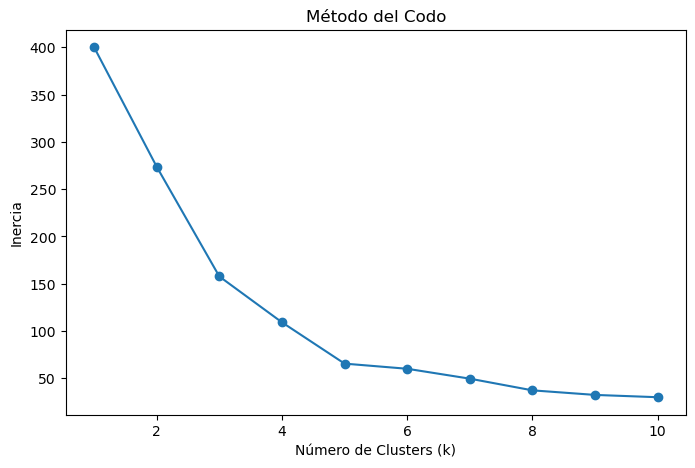

In [13]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()


C:\Users\Mateo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Coeficiente de Silhouette: 0.46658474419000145
Índice de Calinski-Harabasz: 151.3351212635948
Índice de Davies-Bouldin: 0.7164821569435492


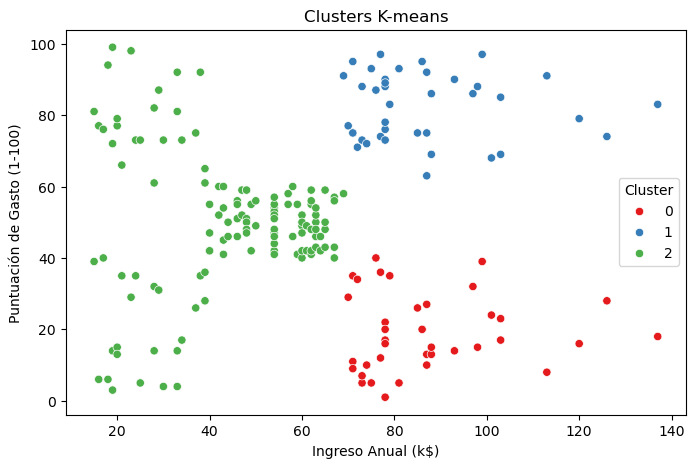

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

df['KMeans_Cluster'] = kmeans_labels

silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans_labels)
davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('Clusters K-means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()


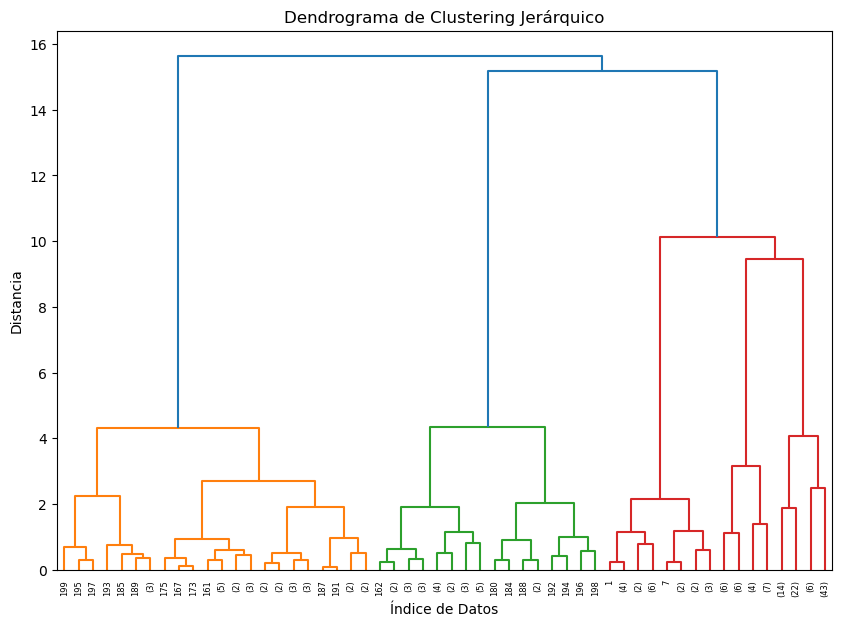

Coeficiente de Silhouette (Jerárquico): 0.4610481446570447
Índice de Calinski-Harabasz (Jerárquico): 143.77956237851728
Índice de Davies-Bouldin (Jerárquico): 0.7072871869794293


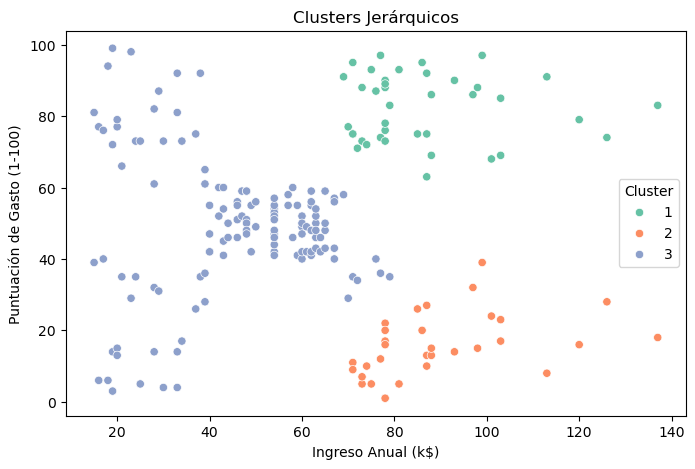

In [17]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de Datos')
plt.ylabel('Distancia')
plt.show()

hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

df['Hierarchical_Cluster'] = hierarchical_labels

silhouette_avg_h = silhouette_score(scaled_data, hierarchical_labels)
calinski_harabasz_h = calinski_harabasz_score(scaled_data, hierarchical_labels)
davies_bouldin_h = davies_bouldin_score(scaled_data, hierarchical_labels)

print(f"Coeficiente de Silhouette (Jerárquico): {silhouette_avg_h}")
print(f"Índice de Calinski-Harabasz (Jerárquico): {calinski_harabasz_h}")
print(f"Índice de Davies-Bouldin (Jerárquico): {davies_bouldin_h}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=hierarchical_labels, palette='Set2')
plt.title('Clusters Jerárquicos')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()
